d:\work\python\forecast\.venv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


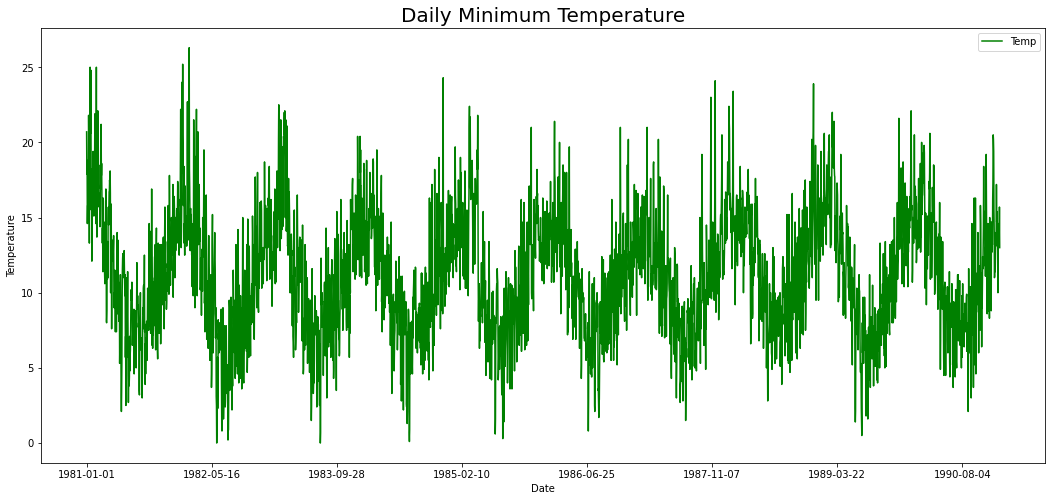

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import datetime

# nama file csv
file_csv = 'daily-min-temperatures.csv'
# nama kolom untuk index (Month)
index_name = 'Date'
# nama kolom untuk data (Sales)
data_name = 'Temp'

df = pd.read_csv(file_csv, header=0, index_col=index_name)

def show_plot(df, title, color):
    df.plot(color=color, figsize=(18,8))
    plt.title(title, fontsize=20)
    plt.xlabel('Date')
    plt.ylabel('Temperature')

show_plot(df, 'Daily Minimum Temperature', 'green')
plt.show()

# Moving Average

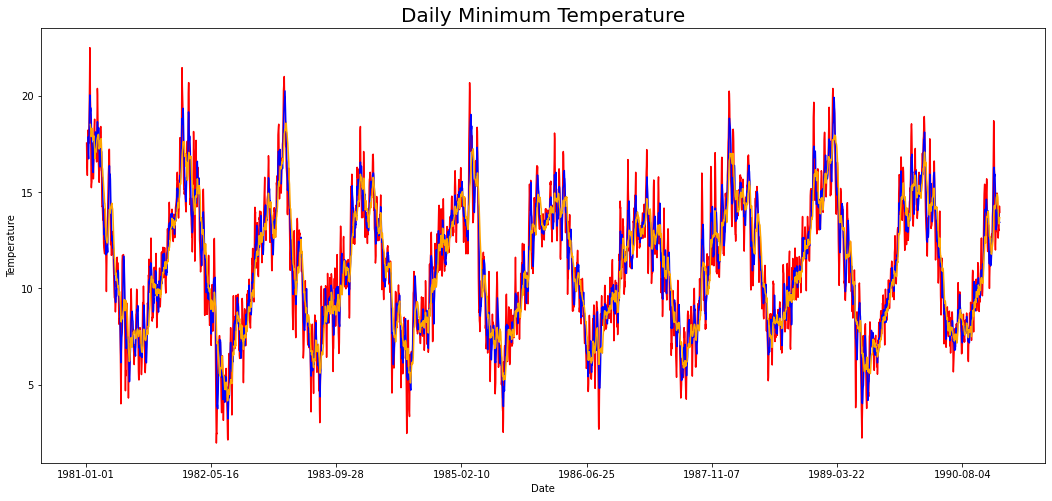

MSE
mse5: 5.150234513031551
mse10: 6.249205494505494
mse20: 7.065721825068872

MAPE
mse5: 9884443626602.143
mse10: 15997676698324.584
mse20: 18386596825793.883


In [9]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape

df['sma5'] = df['Temp'].rolling(window=5).mean()
df['sma10'] = df['Temp'].rolling(window=10).mean()
df['sma20'] = df['Temp'].rolling(window=20).mean()

# show_plot(df['Temp'], 'Daily Minimum Temperature', 'green')
show_plot(df['sma5'], 'Daily Minimum Temperature', 'red')
show_plot(df['sma10'], 'Daily Minimum Temperature', 'blue')
show_plot(df['sma20'], 'Daily Minimum Temperature', 'orange')
plt.show()


mse5 = mse(df['Temp'][5:], df['sma5'][5:])
mse10 = mse(df['Temp'][10:], df['sma10'][10:])
mse20 = mse(df['Temp'][20:], df['sma20'][20:])

print("MSE")
print('mse5: '+ str(mse5))
print('mse10: '+ str(mse10))
print('mse20: '+ str(mse20))

mse5 = mape(df['Temp'][5:], df['sma5'][5:])
mse10 = mape(df['Temp'][10:], df['sma10'][10:])
mse20 = mape(df['Temp'][20:], df['sma20'][20:])

print("\nMAPE")
print('mse5: '+ str(mse5))
print('mse10: '+ str(mse10))
print('mse20: '+ str(mse20))